# Random Forest

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report

In [2]:
df=pd.read_excel('car_evaluation.xlsx')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
df.columns = ['buying','maint','doors','persons','lug_boot','safety','Target']
df.sample(5)

,buying,maint,doors,persons,lug_boot,safety,Target
941,med,vhigh,4,more,big,low,unacc
1098,med,med,2,more,small,med,unacc
670,high,med,2,more,med,high,acc
848,high,low,5more,4,med,low,unacc
153,vhigh,high,3,more,small,med,unacc


In [4]:
df=df.replace('vhigh',3)
df=df.replace('low',0)
df=df.replace('med',1)
df=df.replace('5more',3)
df=df.replace('high',2)
df=df.replace('small',1)
df=df.replace('big',2)
df=df.replace('more',2)
df=df.replace('unacc',0)
df=df.replace('acc',1)
df=df.replace('good',2)
df=df.replace('vgood',3)

In [5]:
df.sample(20)

,buying,maint,doors,persons,lug_boot,safety,Target
1409,0,2,2,2,2,0,0
331,3,0,2,2,2,2,0
1645,0,0,2,2,2,2,3
269,3,1,4,2,1,0,0
408,3,0,3,2,1,1,0
1224,1,0,3,4,1,1,1
971,1,2,2,2,1,0,0
1721,0,0,3,2,1,0,0
490,2,3,4,2,1,2,0
1268,1,0,3,2,1,0,0


In [6]:
df.sample(10)

,buying,maint,doors,persons,lug_boot,safety,Target
1045,1,2,4,2,1,2,1
857,2,0,3,2,1,0,0
150,3,2,3,4,2,1,0
1507,0,2,3,2,1,2,3
1299,0,3,2,2,1,1,0
1294,1,0,3,2,2,2,3
1711,0,0,3,4,1,2,2
1641,0,0,2,2,1,1,1
900,1,3,3,4,1,1,0
877,1,3,2,4,1,2,1


In [7]:
x= df.iloc[:, [2,3]].values  
y= df.iloc[:, 4].values  

In [8]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

In [9]:
print("total number of train data:", y_train.sum())
print("total number of test data:", y_test.sum())

total number of train data: 1728
total number of test data: 575


In [10]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [11]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [12]:
pd.DataFrame(y_pred)

,0
0,1
1,1
2,1
3,1
4,1
...,...
427,1
428,1
429,1
430,1


In [13]:
from sklearn.metrics import confusion_matrix  
conf_matrix= confusion_matrix(y_test, y_pred)  

In [14]:
conf_matrix

array([[289,   0],
       [143,   0]], dtype=int64)

In [15]:
#confusion_matrix?

# Visulaizing the test set result  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


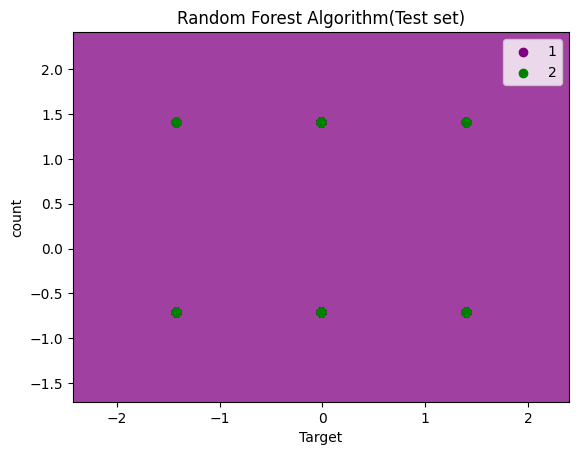

In [16]:
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Random Forest Algorithm(Test set)')  
plt.xlabel('Target')  
plt.ylabel('count')  
plt.legend()  
plt.show()  

In [17]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,Target
0,3,3,2,2,1,1,0
1,3,3,2,2,1,2,0
2,3,3,2,2,1,0,0
3,3,3,2,2,1,1,0
4,3,3,2,2,1,2,0


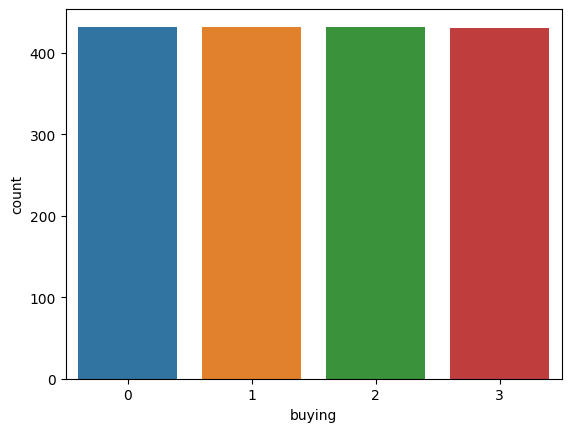

In [18]:
sn.countplot(x='buying',data=df)  
plt.show()  

In [19]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'Target'], dtype='object')

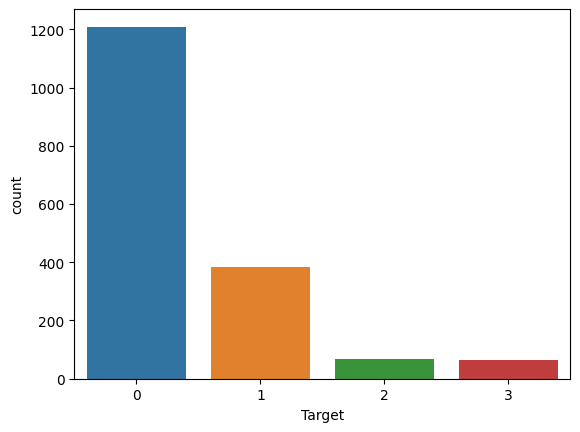

In [20]:
sn.countplot(x='Target',data=df)  
plt.show()  

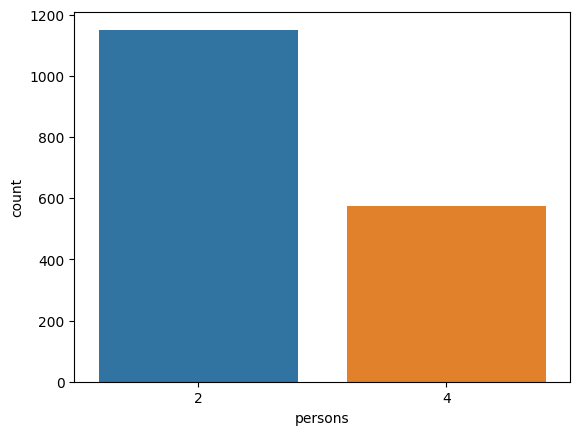

In [21]:
sn.countplot(x='persons',data=df)  
plt.show()  

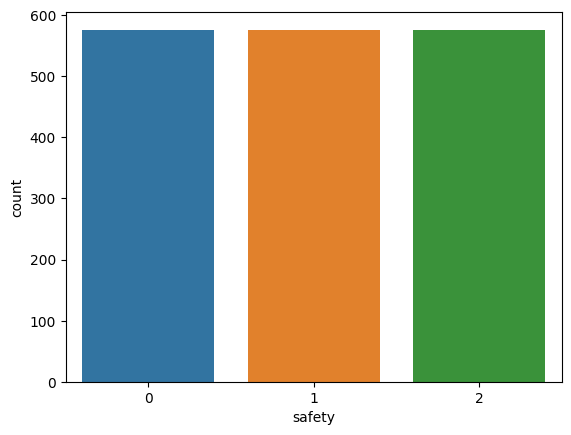

In [22]:
sn.countplot(x='safety',data=df)  
plt.show()

In [23]:
for j in df.columns:
          print(df.groupby(j).agg({'Target':'value_counts'}).groupby(level=0).transform(lambda x: x.div(x.sum())))
          print("--------------------------------")

                 Target
buying Target          
0      0       0.597222
       1       0.206019
       2       0.106481
       3       0.090278
1      0       0.620370
       1       0.266204
       3       0.060185
       2       0.053241
2      0       0.750000
       1       0.250000
3      0       0.832947
       1       0.167053
--------------------------------
                Target
maint Target          
0     0       0.620370
      1       0.212963
      2       0.106481
      3       0.060185
1     0       0.620370
      1       0.266204
      3       0.060185
      2       0.053241
2     0       0.726852
      1       0.243056
      3       0.030093
3     0       0.832947
      1       0.167053
--------------------------------
                Target
doors Target          
2     0       0.754060
      1       0.187935
      2       0.034803
      3       0.023202
3     0       0.685185
      1       0.232639
      2       0.041667
      3       0.040509
4     0       0.675926


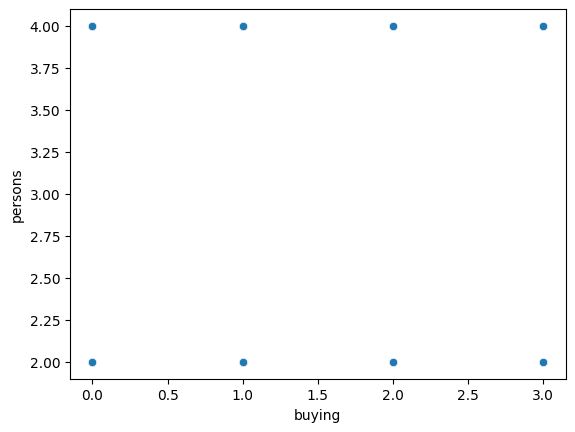

In [24]:
sn.scatterplot(x='buying', y='persons', data=df)
plt.show()

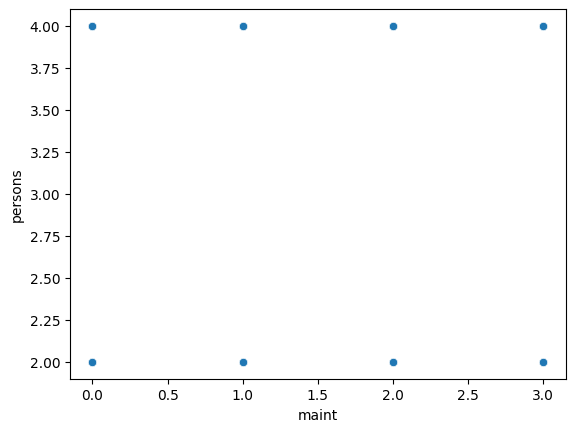

In [25]:
sn.scatterplot(x='maint', y='persons', data=df)
plt.show()

In [26]:
X = df.drop(['Target'], axis=1)
y = df['Target']

<AxesSubplot: >

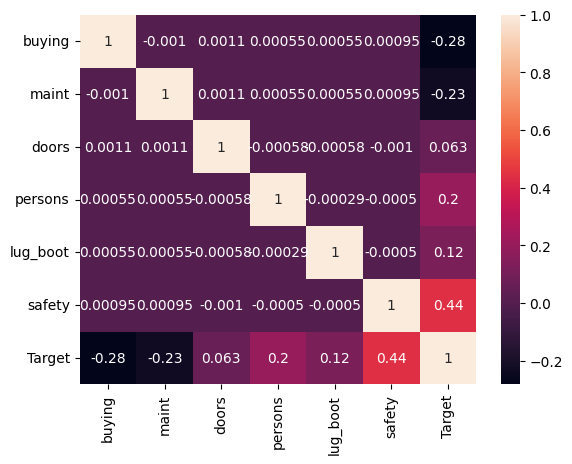

In [27]:
sn.heatmap(df.corr(), annot=True)

In [28]:
# MODEL BUILDING
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 864 points : 204


<BarContainer object of 6 artists>

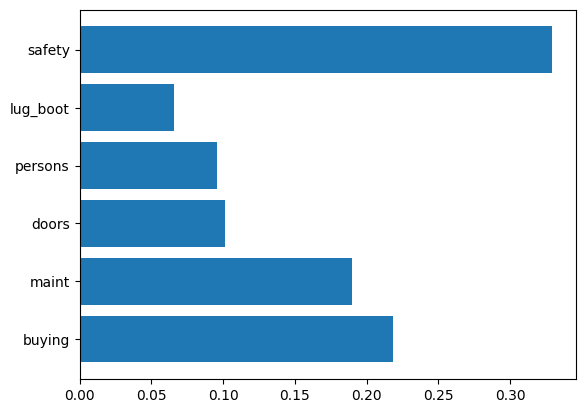

In [29]:
clf.feature_importances_
plt.barh(X.columns, clf.feature_importances_)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       595
           1       0.62      0.57      0.59       196
           2       0.48      0.50      0.49        32
           3       0.68      0.37      0.48        41

    accuracy                           0.76       864
   macro avg       0.65      0.58      0.60       864
weighted avg       0.76      0.76      0.76       864



<AxesSubplot: >

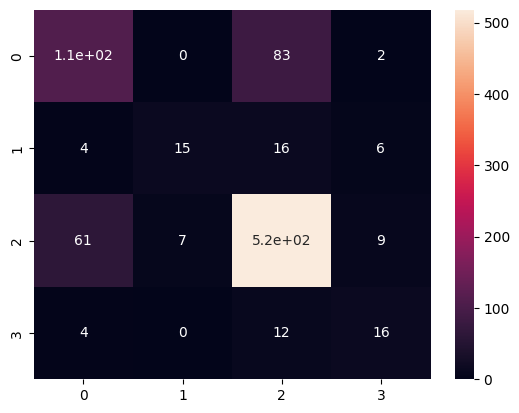

In [31]:
#CONFUSION MATRIX
t_ = {0:'unacc', 1:'acc', 2:'vgood', 3:'good'}
y_test = y_test.replace(t_)
y_pred = pd.DataFrame(y_pred).replace(t_)
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True)